# Dask/MSv4 Hands-on by Jan-Willem @NAOJ

2023/8/30 - 9/1 Mitaka Campus of NAOJ

## 1, Prepare a testbench

By a local user on the test server, installing miniconda and create a test environment by conda.

    $ wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
    $ bash Miniconda3-latest-Linux-x86_64.sh
    $ conda config --set auto_activate_base false
    $ exit

then re-login, and

    $ conda create -n xradio_env python=3.11
    $ cd ; mkdir xradio; cd xradio
    $ conda activate xradio_env

install xradio

    (xradio_env) $ pip install xradio
    (xradio_env) $ git clone https://github.com/casangi/xradio.git
    (xradio_env) $ git checkout 6-experiment-with-schema-implementation
    (xradio_env) $ cd xradio
    (xradio_env) $ pip install -e .
    (xradio_env) $ pip list
    ...
    xradio                    0.0.2       /path/to/xradio/xradio
    ...


Finished making testbench. Open this notebook by VSCode, and set xradio_env(Python 3.11) as python interpreter.

### import modules for the tutorial

In [51]:
import os
import time

from astrohack.astrohack_client import astrohack_local_client
import dask
from xradio.vis.convert_msv2_to_processing_set import convert_msv2_to_processing_set
from xradio.vis.read_processing_set import read_processing_set

## 2, Initialize local cluster

The parameters of astrohack_local_client is decided with the specification of the server running hands-on.

In [1]:
client = astrohack_local_client(cores=8, memory_limit='16GB')
client

2023-09-07 09:48:53,130 - INFO     - astrohack - (_check_parms.py:135) - [_check_logger_parms]: Setting default log_to_term to True.
2023-09-07 09:48:53,131 - INFO     - astrohack - (_check_parms.py:135) - [_check_logger_parms]: Setting default log_to_file to False.
2023-09-07 09:48:53,131 - INFO     - astrohack - (_check_parms.py:135) - [_check_logger_parms]: Setting default log_file to hack_.
2023-09-07 09:48:53,131 - INFO     - astrohack - (_check_parms.py:135) - [_check_logger_parms]: Setting default log_level to INFO.
2023-09-07 09:48:53,132 - INFO     - astrohack - (_check_parms.py:135) - [_check_worker_logger_parms]: Setting default log_to_term to False.
2023-09-07 09:48:53,132 - INFO     - astrohack - (_check_parms.py:135) - [_check_worker_logger_parms]: Setting default log_to_file to False.
2023-09-07 09:48:53,132 - INFO     - astrohack - (_check_parms.py:135) - [_check_worker_logger_parms]: Setting default log_file to hack_.
2023-09-07 09:48:53,133 - INFO     - astrohack - (_

<Client: 'tcp://127.0.0.1:36739' processes=8 threads=8, memory=119.21 GiB>

then, access to the dashboard. (on VSCode, set port forward from 8787 to a port of local PC.)

## 3, Convert MS to MSv4

download sample MeasurementSet by gdown_data(). It executes only once.

In [2]:
from xradio.gdown_utils import list_datasets
list_datasets()

+-----------------------+
| Measurement Table     |
+-----------------------+
| Antennae_South.cal.ms |
| Antennae_North.cal.ms |
+-----------------------+


In [3]:
from xradio.gdown_utils import gdown_data
gdown_data(ms_name="Antennae_North.cal.ms")

Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1sASTyp4gr4PzWZwJr_ZHEdkqcYjF86BT&export=download
From (redirected): https://drive.google.com/uc?id=1sASTyp4gr4PzWZwJr_ZHEdkqcYjF86BT&export=download&confirm=t&uuid=16f889bc-299c-4507-b061-c6b44fd77cce
To: /mnt/cephfs/alma/users-data/kazuhiko.shimada/xradio/xradio/doc/Antennae_North.cal.ms.zip
100%|██████████| 190M/190M [00:10<00:00, 18.5MB/s] 


convert it to ProcessingSet (MSv4) by convert_msv2_to_processing_set()

In [2]:
partition_scheme="ddi_intent_field"
#partition_scheme="ddi_state"

#storage_backend = "netcdf"
storage_backend = "zarr"

ms_path = "Antennae_North.cal.ms"
start = time.time()
os.system("rm -rf Antennae_North.cal.vis.zarr")
convert_msv2_to_processing_set(infile=ms_path, outfile="Antennae_North.cal.vis.zarr",
                               partition_scheme=partition_scheme, parallel=True,
                               storage_backend=storage_backend,overwrite=True)
print('Total time ',time.time()-start)

2023-09-05 11:14:55 INFO     Saved ms_v4 Antennae_North.cal.vis.zarr/Antennae_North.cal_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE_field_id_13 in 3.3998119831085205s
2023-09-05 11:14:55 INFO     Saved ms_v4 Antennae_North.cal.vis.zarr/Antennae_North.cal_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE_field_id_15 in 3.900238037109375s
2023-09-05 11:14:55 INFO     Saved ms_v4 Antennae_North.cal.vis.zarr/Antennae_North.cal_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE_field_id_8 in 3.4249889850616455s
2023-09-05 11:14:55 INFO     Saved ms_v4 Antennae_North.cal.vis.zarr/Antennae_North.cal_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE_field_id_9 in 4.001362323760986s
2023-09-05 11:14:55 INFO     Saved ms_v4 Antennae_North.cal.vis.zarr/Antennae_North.cal_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE_field_id_3 in 3.481320381164551s
2023-09-05 11:14:56 INFO     Saved ms_v4 Antennae_North.cal.vis.zarr/Antennae_Nor

Total time  35.46282625198364


2023-09-05 11:14:58 INFO     Saved ms_v4 Antennae_North.cal.vis.zarr/Antennae_North.cal_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_14 in 0.5181231498718262s
2023-09-05 11:14:58 INFO     Saved ms_v4 Antennae_North.cal.vis.zarr/Antennae_North.cal_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_17 in 0.5282859802246094s
2023-09-05 11:14:58 INFO     Saved ms_v4 Antennae_North.cal.vis.zarr/Antennae_North.cal_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_5 in 0.4565696716308594s
2023-09-05 11:14:58 INFO     Saved ms_v4 Antennae_North.cal.vis.zarr/Antennae_North.cal_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_21 in 0.5034105777740479s
2023-09-05 11:14:58 INFO     Saved ms_v4 Antennae_North.cal.vis.zarr/Antennae_North.cal_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE_field_id_17 in 0.3493204116821289s
2023-09-05 11:14:58 INFO     Saved ms_v4 Antennae_North.cal.vis.zarr/Antennae_North.cal_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_13 in 0.40297937393188477s


Convert the big-sample MS of SD:

In [ ]:
partition_scheme="ddi_intent_field"
storage_backend = "zarr"

ms_path = "uid___A002_Xf3fea6_X37c0.32xchan.ms"
outfile = "uid___A002_Xf3fea6_X37c0.32xchan.zarr"

start = time.time()
convert_msv2_to_processing_set(infile=ms_path, outfile=outfile,
                               partition_scheme=partition_scheme, parallel=True,
                               storage_backend=storage_backend,overwrite=True)
print('Total time ',time.time()-start)

read the ProcessingSet:

In [13]:
ps = read_processing_set(outfile)
ps_keys=list(ps.keys())
ps.keys()

dict_keys(['uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_19_intent_OBSERVE_TARGET#OFF_SOURCE_field_id_1', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE_field_id_12', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_4_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_21_intent_CALIBRATE_ATMOSPHERE#OFF_SOURCE,CALIBRATE_WVR#OFF_SOURCE_field_id_1', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_17_intent_CALIBRATE_ATMOSPHERE#HOT,CALIBRATE_WVR#HOT_field_id_1', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_16_intent_CALIBRATE_ATMOSPHERE#HOT,CALIBRATE_WVR#HOT_field_id_1', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_17_intent_CALIBRATE_ATMOSPHERE#OFF_SOURCE,CALIBRATE_WVR#OFF_SOURCE_field_id_1', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_24_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_22_intent_CALIBRATE_ATMOSPHERE#HOT,CALIBRATE_WVR#HOT_field_id_1', 'uid___A002_Xf3fea6_X37c0.32

read the ProcessingSet with intents=['OBSERVE_TARGET#ON_SOURCE']

In [14]:
ps = read_processing_set(outfile, intents=['OBSERVE_TARGET#ON_SOURCE'])
ps_keys=list(ps.keys())
ps_keys

['uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_4_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_24_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_20',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_19',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_11',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_21_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_23_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_15_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_5',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_19_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_14_intent_OBSERVE_TARGET#ON_SOURCE_fie


Get xarray.Dataset from ProcessingSet, and click the store icon of SPECTRUM, then see the chank size.

In [16]:
xds = ps['uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_17_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2'] # set a key in ps_keys
xds

<xarray.Dataset>
Dimensions:                     (time: 6804, baseline_id: 3, frequency: 65536,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_id        (baseline_id) int64 dask.array<chunksize=(3,), meta=np.ndarray>
    baseline_antenna2_id        (baseline_id) int64 dask.array<chunksize=(3,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 0 1 2
  * frequency                   (frequency) float64 2.194e+11 ... 2.193e+11
  * polarization                (polarization) <U2 'XX' 'YY'
  * time                        (time) float64 1.639e+09 1.639e+09 ... 1.639e+09
  * uvw_label                   (uvw_label) <U1 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 dask.array<chunksize=(6804, 3), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool dask.array<chunksize=(6804, 3, 65536, 2), meta=np.ndarray>
    SPECTRUM                    (time, baseline_id, frequency, polarization) float32 dask.array<chunksize=(6804, 3, 65536, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 dask.array<chunksize=(6804, 3), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 dask.array<chunksize=(6804, 3, 3), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, polarization) float32 dask.array<chunksize=(6804, 3, 2), meta=np.ndarray>
Attributes:
    field_info:   {'code': 'none', 'delay_dir': [1.4079866327380335, -1.18494...
    intent:       OBSERVE_TARGET#ON_SOURCE
    antenna_xds:  <xarray.Dataset>\nDimensions:        (antenna_id: 3, xyz: 3...

Next, convert MSv2 into ProcessingSet/xarray.DataSet with the parameter 'chunks_on_disk' specify a chunk size on disk. Then click the store icon of SPECTRUM of XDS and check the chanks splited.

In [52]:
start = time.time()
convert_msv2_to_processing_set(infile=ms_path, outfile=outfile, chunks_on_disk={'time':1000},
                               partition_scheme=partition_scheme, parallel=True,
                               storage_backend=storage_backend,overwrite=True)
print('Total time ',time.time()-start)

2023-09-07 11:17:14 INFO     Saved ms_v4 uid___A002_Xf3fea6_X37c0.32xchan.zarr/uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_20_intent_CALIBRATE_ATMOSPHERE#OFF_SOURCE,CALIBRATE_WVR#OFF_SOURCE_field_id_1 in 1.6564686298370361s
2023-09-07 11:17:15 INFO     Saved ms_v4 uid___A002_Xf3fea6_X37c0.32xchan.zarr/uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_1_intent_CALIBRATE_POINTING#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE_field_id_0 in 2.036090612411499s
2023-09-07 11:17:15 INFO     Saved ms_v4 uid___A002_Xf3fea6_X37c0.32xchan.zarr/uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_CALIBRATE_POINTING#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE_field_id_0 in 1.8157241344451904s
2023-09-07 11:17:15 INFO     Saved ms_v4 uid___A002_Xf3fea6_X37c0.32xchan.zarr/uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_7_intent_CALIBRATE_POINTING#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE_field_id_0 in 1.640190601348877s
2023-09-07 11:17:15 INFO     Saved ms_v4 uid___A002_Xf3fea6_X37c0.32xchan.zarr/uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_16_inten

Total time  80.36517214775085


2023-09-07 11:18:33 INFO     Saved ms_v4 uid___A002_Xf3fea6_X37c0.32xchan.zarr/uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_19_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2 in 37.696330547332764s


In [53]:
ps = read_processing_set(outfile, intents=['OBSERVE_TARGET#ON_SOURCE'])
xds = ps['uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_17_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2']
xds

<xarray.Dataset>
Dimensions:                     (time: 6804, baseline_id: 3, frequency: 65536,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_id        (baseline_id) int64 dask.array<chunksize=(3,), meta=np.ndarray>
    baseline_antenna2_id        (baseline_id) int64 dask.array<chunksize=(3,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 0 1 2
  * frequency                   (frequency) float64 2.194e+11 ... 2.193e+11
  * polarization                (polarization) <U2 'XX' 'YY'
  * time                        (time) float64 1.639e+09 1.639e+09 ... 1.639e+09
  * uvw_label                   (uvw_label) <U1 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 dask.array<chunksize=(1000, 3), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool dask.array<chunksize=(1000, 3, 65536, 2), meta=np.ndarray>
    SPECTRUM                    (time, baseline_id, frequency, polarization) float32 dask.array<chunksize=(1000, 3, 65536, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 dask.array<chunksize=(1000, 3), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 dask.array<chunksize=(1000, 3, 3), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, polarization) float32 dask.array<chunksize=(1000, 3, 2), meta=np.ndarray>
Attributes:
    field_info:   {'code': 'none', 'delay_dir': [1.4079866327380335, -1.18494...
    intent:       OBSERVE_TARGET#ON_SOURCE
    antenna_xds:  <xarray.Dataset>\nDimensions:        (antenna_id: 3, xyz: 3...

## 4, Process MSv4

Reload MSv4 and keys of it. Note that the ProcessingSet has metadata only.

In [54]:
outfile = "uid___A002_Xf3fea6_X37c0.32xchan.zarr"

ps = read_processing_set(outfile, intents=['OBSERVE_TARGET#ON_SOURCE'])
ps_keys=list(ps.keys())
ps.keys()

dict_keys(['uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_4_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_24_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_20', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_19', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_11', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_21_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_23_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_15_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_5', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_19_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_14_intent_OBSERVE_TARGET#ON_SOURCE_fie

In [55]:
ps.summary()

name  \
0   uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_4_in...   
1   uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_24_i...   
2   uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
3   uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
4   uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
5   uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_21_i...   
6   uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_23_i...   
7   uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_15_i...   
8   uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
9   uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_19_i...   
10  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_14_i...   
11  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
12  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
13  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
14  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
15  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
16  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_13_i...   
17  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
18  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
19  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_20_i...   
20  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
21  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
22  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
23  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_22_i...   
24  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
25  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_18_i...   
26  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
27  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
28  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_17_i...   
29  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
30  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
31  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_16_i...   
32  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
33  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
34  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   
35  uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_in...   

                      intent                field_name  \
0   OBSERVE_TARGET#ON_SOURCE                     N44_S   
1   OBSERVE_TARGET#ON_SOURCE                     N44_S   
2   OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
3   OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
4   OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
5   OBSERVE_TARGET#ON_SOURCE                     N44_S   
6   OBSERVE_TARGET#ON_SOURCE                     N44_S   
7   OBSERVE_TARGET#ON_SOURCE                     N44_S   
8   OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
9   OBSERVE_TARGET#ON_SOURCE                     N44_S   
10  OBSERVE_TARGET#ON_SOURCE                     N44_S   
11  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
12  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
13  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
14  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
15  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
16  OBSERVE_TARGET#ON_SOURCE                     N44_S   
17  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
18  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
19  OBSERVE_TARGET#ON_SOURCE                     N44_S   
20  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
21  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
22  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
23  OBSERVE_TARGET#ON_SOURCE                     N44_S   
24  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
25  OBSERVE_TARGET#ON_SOURCE                     N44_S   
26  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
27  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
28  OBSERVE_TARGET#ON_SOURCE                     N44_S   
29  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
30  OBSERVE_TARGET#ON_SOURCE  NGC4038 - Antennae North   
31  OBSERVE_TARGET#ON_SOURCE                     N44_S   
32  OBSERVE_TARGET#ON_SOU

In [48]:
ps_keys

['uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_4_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_24_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_20',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_19',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_11',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_21_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_23_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_15_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_0_intent_OBSERVE_TARGET#ON_SOURCE_field_id_5',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_19_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2',
 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_14_intent_OBSERVE_TARGET#ON_SOURCE_fie

Get xarray.DataSet specified in MSv4.

In [24]:
xds  = ps['uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_17_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2']
xds

<xarray.Dataset>
Dimensions:                     (time: 6804, baseline_id: 3, frequency: 65536,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_id        (baseline_id) int64 dask.array<chunksize=(3,), meta=np.ndarray>
    baseline_antenna2_id        (baseline_id) int64 dask.array<chunksize=(3,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 0 1 2
  * frequency                   (frequency) float64 2.194e+11 ... 2.193e+11
  * polarization                (polarization) <U2 'XX' 'YY'
  * time                        (time) float64 1.639e+09 1.639e+09 ... 1.639e+09
  * uvw_label                   (uvw_label) <U1 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 dask.array<chunksize=(1000, 3), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool dask.array<chunksize=(1000, 3, 65536, 2), meta=np.ndarray>
    SPECTRUM                    (time, baseline_id, frequency, polarization) float32 dask.array<chunksize=(1000, 3, 65536, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 dask.array<chunksize=(1000, 3), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 dask.array<chunksize=(1000, 3, 3), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, polarization) float32 dask.array<chunksize=(1000, 3, 2), meta=np.ndarray>
Attributes:
    field_info:   {'code': 'none', 'delay_dir': [1.4079866327380335, -1.18494...
    intent:       OBSERVE_TARGET#ON_SOURCE
    antenna_xds:  <xarray.Dataset>\nDimensions:        (antenna_id: 3, xyz: 3...

Now we can execute the functions of xarray.DataSet like below.

In [56]:
xds.mean(dim='time')

<xarray.Dataset>
Dimensions:                     (baseline_id: 3, frequency: 65536,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_id        (baseline_id) int64 dask.array<chunksize=(3,), meta=np.ndarray>
    baseline_antenna2_id        (baseline_id) int64 dask.array<chunksize=(3,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 0 1 2
  * frequency                   (frequency) float64 2.194e+11 ... 2.193e+11
  * polarization                (polarization) <U2 'XX' 'YY'
  * uvw_label                   (uvw_label) <U1 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (baseline_id) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    FLAG                        (baseline_id, frequency, polarization) float64 dask.array<chunksize=(3, 65536, 2), meta=np.ndarray>
    SPECTRUM                    (baseline_id, frequency, polarization) float32 dask.array<chunksize=(3, 65536, 2), meta=np.ndarray>
    TIME_CENTROID               (baseline_id) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    UVW                         (baseline_id, uvw_label) float64 dask.array<chunksize=(3, 3), meta=np.ndarray>
    WEIGHT                      (baseline_id, polarization) float32 dask.array<chunksize=(3, 2), meta=np.ndarray>

In [57]:
ps[ps_keys[0]].attrs['field_info'] #Add frame info

{'code': 'none',
 'delay_dir': [1.4079866327380335, -1.1849449474539933],
 'name': 'N44_S',
 'num_poly': 0,
 'phase_dir': [1.4079866327380335, -1.1849449474539933],
 'reference_dir': [1.4079866327370052, -1.184944947453636],
 'time': 5146183315.2960005}

In [27]:
ps[ps_keys[0]].attrs['antenna_xds'] 

<xarray.Dataset>
Dimensions:        (antenna_id: 3, xyz: 3)
Dimensions without coordinates: antenna_id, xyz
Data variables:
    dish_diameter  (antenna_id) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    flag_row       (antenna_id) bool dask.array<chunksize=(3,), meta=np.ndarray>
    mount          (antenna_id) <U6 dask.array<chunksize=(3,), meta=np.ndarray>
    name           (antenna_id) <U4 dask.array<chunksize=(3,), meta=np.ndarray>
    offset         (antenna_id, xyz) float64 dask.array<chunksize=(3, 3), meta=np.ndarray>
    position       (antenna_id, xyz) float64 dask.array<chunksize=(3, 3), meta=np.ndarray>
    station        (antenna_id) <U4 dask.array<chunksize=(3,), meta=np.ndarray>
    type           (antenna_id) <U12 dask.array<chunksize=(3,), meta=np.ndarray>

In [28]:
ps[ps_keys[0]].UVW

<xarray.DataArray 'UVW' (time: 1520, baseline_id: 3, uvw_label: 3)>
dask.array<open_dataset-UVW, shape=(1520, 3, 3), dtype=float64, chunksize=(1000, 3, 3), chunktype=numpy.ndarray>
Coordinates:
    baseline_antenna1_id  (baseline_id) int64 dask.array<chunksize=(3,), meta=np.ndarray>
    baseline_antenna2_id  (baseline_id) int64 dask.array<chunksize=(3,), meta=np.ndarray>
  * baseline_id           (baseline_id) int64 0 1 2
  * time                  (time) float64 1.639e+09 1.639e+09 ... 1.639e+09
  * uvw_label             (uvw_label) <U1 'u' 'v' 'w'
Attributes:
    description:  uvw coordinates.
    type:         uvw
    units:        m

In [29]:
xds.frequency>3.444359e+11

<xarray.DataArray 'frequency' (frequency: 65536)>
array([False, False, False, ..., False, False, False])
Coordinates:
  * frequency  (frequency) float64 2.194e+11 2.194e+11 ... 2.193e+11 2.193e+11

In [30]:
xds.isel(baseline_id=slice(5,10),drop=False).where(xds.frequency>3.444359e+11,drop=True)

<xarray.Dataset>
Dimensions:                     (time: 6804, baseline_id: 0, frequency: 0,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_id        (baseline_id) int64 dask.array<chunksize=(0,), meta=np.ndarray>
    baseline_antenna2_id        (baseline_id) int64 dask.array<chunksize=(0,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 
  * frequency                   (frequency) float64 
  * polarization                (polarization) <U2 'XX' 'YY'
  * time                        (time) float64 1.639e+09 1.639e+09 ... 1.639e+09
  * uvw_label                   (uvw_label) <U1 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id, frequency) float64 dask.array<chunksize=(1000, 0, 0), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) float64 dask.array<chunksize=(1000, 0, 0, 2), meta=np.ndarray>
    SPECTRUM                    (time, baseline_id, frequency, polarization) float32 dask.array<chunksize=(1000, 0, 0, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id, frequency) float64 dask.array<chunksize=(1000, 0, 0), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label, frequency) float64 dask.array<chunksize=(1000, 0, 3, 0), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, polarization, frequency) float32 dask.array<chunksize=(1000, 0, 2, 0), meta=np.ndarray>
Attributes:
    field_info:   {'code': 'none', 'delay_dir': [1.4079866327380335, -1.18494...
    intent:       OBSERVE_TARGET#ON_SOURCE
    antenna_xds:  <xarray.Dataset>\nDimensions:        (antenna_id: 3, xyz: 3...

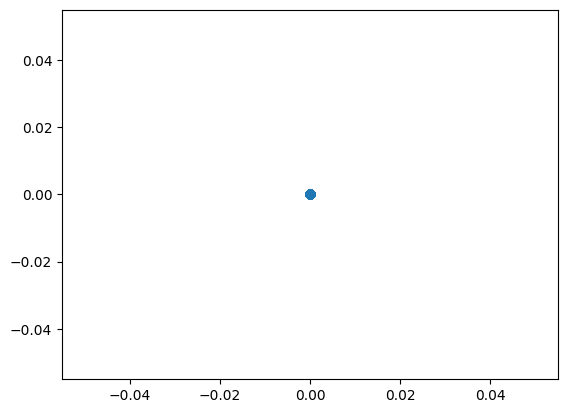

In [31]:
uv = xds.UVW.sel(uvw_label=['u','v'])

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(uv[:,:,0].values.flatten(),uv[:,:,1].values.flatten())
plt.show()

In [59]:
import xarray as xr
phase_dir = xr.DataArray(
    data=ps[ps_keys[0]].attrs['field_info']['phase_dir'],
    dims=["ra_dec"],
    attrs=dict(
        description="Phase Direction",
        units="rad",
    ),
)
phase_dir

<xarray.DataArray (ra_dec: 2)>
array([ 1.40798663, -1.18494495])
Dimensions without coordinates: ra_dec
Attributes:
    description:  Phase Direction
    units:        rad

## 5, Graphs and lazy evaluation

Generate a graph map that is a calculation of means of SPECTRUM per chunk by stroviper._concurrency._graph_tools._map._graph_map() .

In [66]:
parallel_dims = ['time'] #['pol','time','baseline']

from astroviper._concurrency._graph_tools._map import _graph_map

def mymean(input_parms):
    from xradio.vis.load_processing_set import load_processing_set
    ps = load_processing_set(input_parms['ps_name'],sel_parms=input_parms['data_sel'])
    print(ps.keys())
    spectrum_mean = ps[ps_keys[0]].SPECTRUM.mean()
    return spectrum_mean

infile = 'uid___A002_Xf3fea6_X37c0.32xchan.zarr'
sel_parms={'intents': ['OBSERVE_TARGET#ON_SOURCE'], 'fields': ['N44_S']}
viper_client=None
graph = _graph_map(infile, sel_parms, parallel_coords=xds, parallel_dims=parallel_dims,
                   func_chunk=mymean, client=viper_client)
graph


chunk_indx 0 (0,)
chunk_indx 1 (1,)
chunk_indx 2 (2,)
chunk_indx 3 (3,)
chunk_indx 4 (4,)
chunk_indx 5 (5,)
chunk_indx 6 (6,)


([Delayed('mymean-337d478e-c470-4887-8402-77d342c0b419'),
  Delayed('mymean-1db4edfb-d927-4232-b69c-a5c0f935c94a'),
  Delayed('mymean-76ea5fc6-fd7d-44e4-9338-8563418fa2e7'),
  Delayed('mymean-a6052be4-f93e-4727-9c60-4ad148365ad9'),
  Delayed('mymean-aa68e5ad-4874-4b94-9c40-5ca06f604a7f'),
  Delayed('mymean-f706c99a-07e7-4190-af03-e53e5667b4a0'),
  Delayed('mymean-a5ec538e-2b16-43c4-8b7e-c229cdb84f69')],
 None)

Graph object can be visualized by a dask function.

2023-09-07 11:43:51 DEBUG    run [PosixPath('dot'), '-Kdot', '-Tpng']


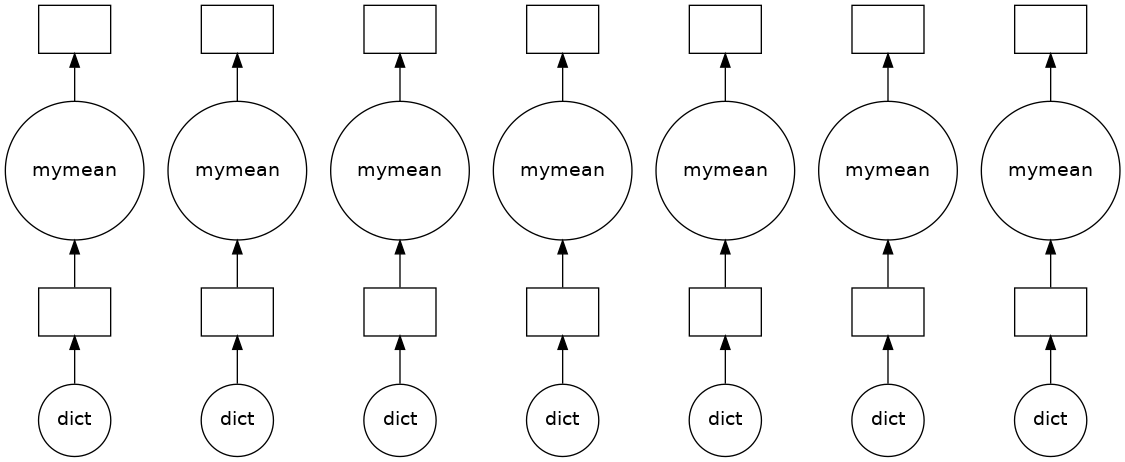

In [61]:
dask.visualize(graph[0], filename='foo.png')

open the dashboard (http://127.0.0.1:8787/), then execute dask.compute()

In [62]:
dask.compute(graph)

dict_keys(['uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_4_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_24_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_21_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_23_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_15_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_19_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_14_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_13_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_20_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_22_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_18_intent_OBSERVE_TARGET#ON_SOURCE_fi

(([<xarray.DataArray 'SPECTRUM' ()>
   array(103.32568, dtype=float32),
   <xarray.DataArray 'SPECTRUM' ()>
   array(105.14698, dtype=float32),
   <xarray.DataArray 'SPECTRUM' ()>
   array(106.69422, dtype=float32),
   <xarray.DataArray 'SPECTRUM' ()>
   array(107.44187, dtype=float32),
   <xarray.DataArray 'SPECTRUM' ()>
   array(107.53681, dtype=float32),
   <xarray.DataArray 'SPECTRUM' ()>
   array(107.499016, dtype=float32),
   <xarray.DataArray 'SPECTRUM' ()>
   array(109.31185, dtype=float32)],
  None),)

Execute _graph_reduce() to calculate mean of all of chunks.

In [70]:
from astroviper._concurrency._graph_tools._reduce import _graph_reduce

def meanmymean(ps_0, ps_1, input_parms):
    print("meanmymean: ", ps_0, ps_1)
    return (ps_0 + ps_1) / 2

input_parms = {}
graph_reduced=_graph_reduce(graph, meanmymean, input_parms)
graph_reduced

[Delayed('meanmymean-1c474b90-6f46-430a-8848-f2a958eade45')]

2023-09-07 12:00:13 DEBUG    run [PosixPath('dot'), '-Kdot', '-Tpng']


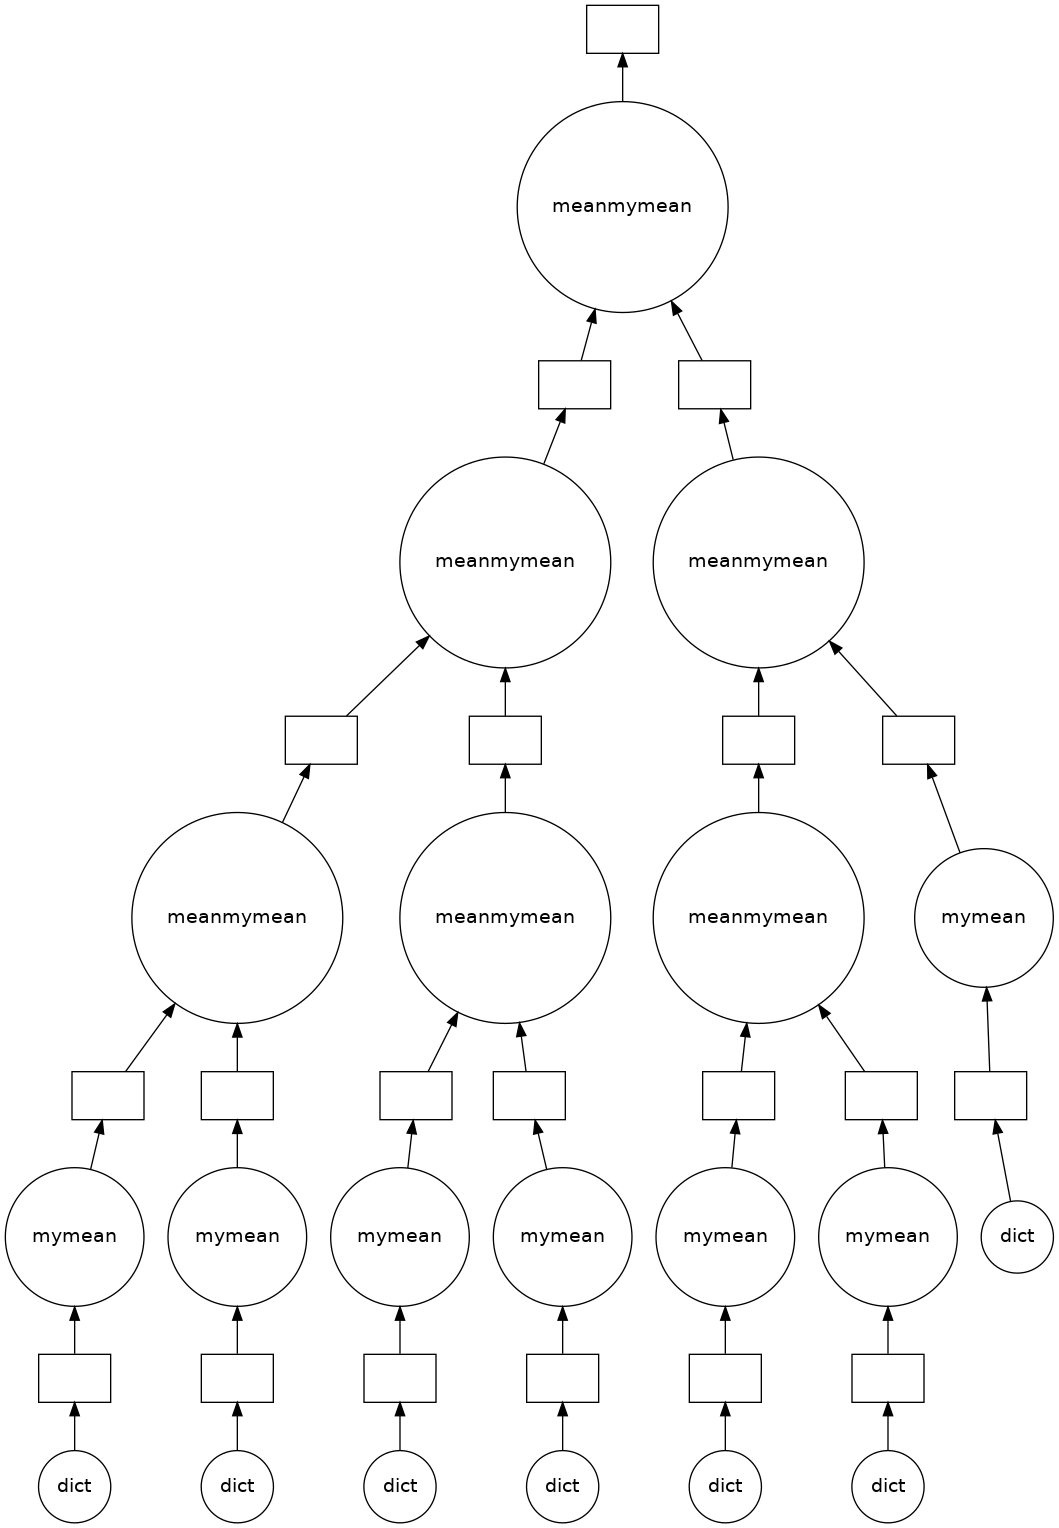

In [71]:
dask.visualize(graph_reduced[0], filename='bar.png')

In [72]:
dask.compute(graph_reduced)

dict_keys(['uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_4_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_24_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_21_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_23_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_15_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_19_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_14_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_13_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_20_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_22_intent_OBSERVE_TARGET#ON_SOURCE_field_id_2', 'uid___A002_Xf3fea6_X37c0.32xchan.zarr_ddi_18_intent_OBSERVE_TARGET#ON_SOURCE_fi

([<xarray.DataArray 'SPECTRUM' ()>
  array(107.033535)],)